In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Loading and Understanding the Data**

In [165]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [166]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (8693, 14)
Test data shape: (4277, 13)


In [167]:
# First 5 rows in train dataset
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [168]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [169]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [170]:
# How many duplicated rows our data set?
#train_data.duplicated().sum()

In [171]:
# PassengerId column should not be in dataset as a column, but index
train_data.set_index("PassengerId", inplace=True)

# Drop Name column which we don't need
train_data.drop("Name", axis=1, inplace=True)

In [172]:
# Boolean to Integer
# VIP, CryoSleep and Transported columns are boolean.
# Lets convert boolean to integer.
def convert_bool_to_int(data, columns):
    print("Boolean to integer process starting ...")
    for col in columns:
        data[col] = [0 if x == False else 1 for x in data[col]]
        
        print(f"Process for {col} column finished.")
    print("All process completed.")
    return data
train_data = convert_bool_to_int(train_data, ["VIP", "CryoSleep", "Transported"])

Boolean to integer process starting ...
Process for VIP column finished.
Process for CryoSleep column finished.
Process for Transported column finished.
All process completed.


In [173]:
# Cabin column have 3 values each rows: deck, number, side. 
# We now split the values
def split_cabin_col(data):
    cabin_split = data['Cabin'].str.split(pat = "/", expand = True)
    data[["Deck", "Number", "Side"]] = cabin_split
    print("Deck, Number and Side columns created from Cabin column.")
    data.drop("Cabin", axis=1, inplace=True)
    print("Cabin column dropped.")
    return data

train_data = split_cabin_col(train_data)

Deck, Number and Side columns created from Cabin column.
Cabin column dropped.


In [174]:
# See now how our dataset is
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


<AxesSubplot:>

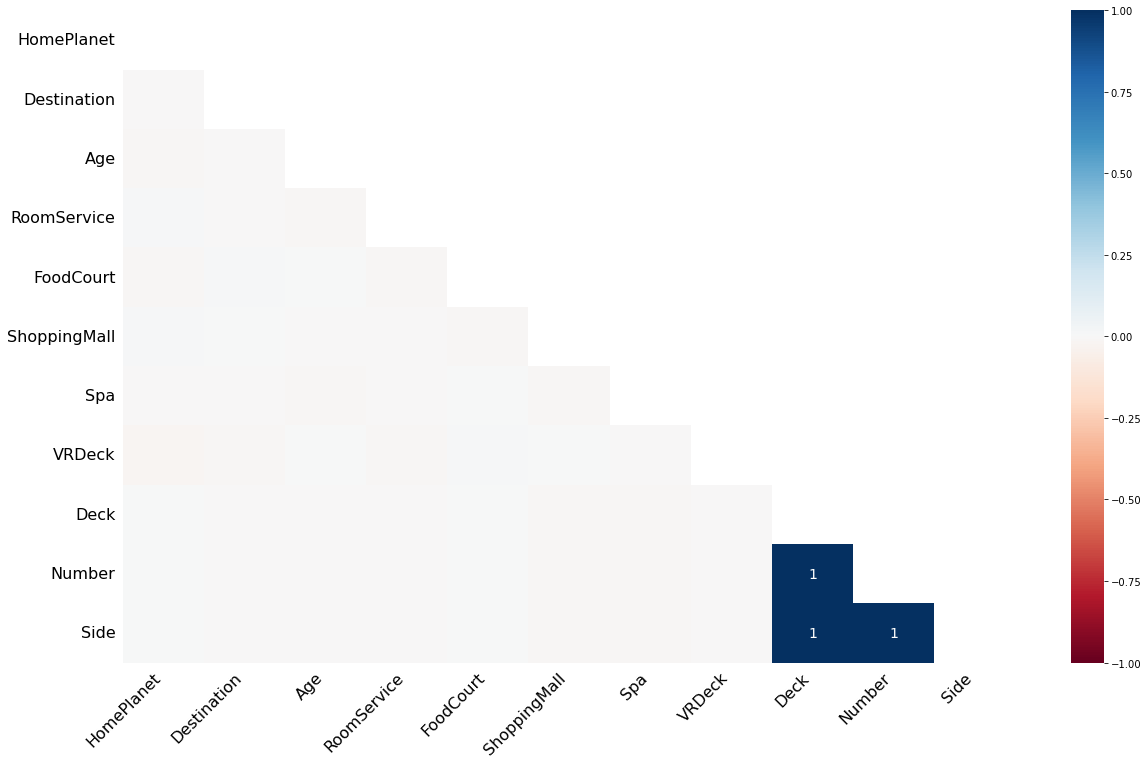

In [175]:
# Lets see missing value in matrix format
import missingno as msgn

msgn.heatmap(train_data)

In [176]:
print("for VIP=0:")
print(train_data[train_data["HomePlanet"].isnull()][train_data["VIP"]==0].shape[0])
print("\nfor VIP=1:")
print(train_data[train_data["HomePlanet"].isnull()][train_data["VIP"]==1].shape[0])

for VIP=0:
193

for VIP=1:
8


C:\Users\SABANK~1.D\AppData\Local\Temp/ipykernel_7780/671845525.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[train_data["HomePlanet"].isnull()][train_data["VIP"]==0].shape[0])
C:\Users\SABANK~1.D\AppData\Local\Temp/ipykernel_7780/671845525.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[train_data["HomePlanet"].isnull()][train_data["VIP"]==1].shape[0])


In [177]:
train_data["Destination"][(train_data["CryoSleep"]==0) & (train_data["VIP"]==0) & (train_data["HomePlanet"]=="Earth")].value_counts()

TRAPPIST-1e      2163
55 Cancri e       459
PSO J318.5-22     330
Name: Destination, dtype: int64

In [178]:
train_data["Destination"].fillna("TRAPPIST-1e", axis=0, inplace=True)
train_data["HomePlanet"].fillna("Earth", axis=0, inplace=True)
mean_age_of_nan = train_data["Age"][(train_data["CryoSleep"]==0) & (train_data["VIP"]==0) & (train_data["HomePlanet"]=="Earth") & (train_data["Destination"]=="TRAPPIST-1e")].mean()
print("Mean age:", mean_age_of_nan)
train_data["Age"].fillna(int(mean_age_of_nan), axis=0, inplace=True)

Mean age: 27.75217013888889


In [179]:
train_data["Destination"][(train_data["CryoSleep"]==0) & (train_data["VIP"]==0) & (train_data["HomePlanet"]=="Earth") & (train_data["Age"].isnull())].value_counts()

Series([], Name: Destination, dtype: int64)

In [180]:
# Fill missing value with average of some columns values
fill_as_mean_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

def fillna_mean(data, columns):
    for col in columns:
        data[col].fillna(data[col].mean(), axis=0, inplace=True)
    return data

train_data = fillna_mean(train_data, fill_as_mean_cols)
#Remove others
train_data.dropna(axis=0, inplace=True)

In [181]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Number          0
Side            0
dtype: int64

# ****One Hot Encoder****

In [182]:
cols_for_dummies = ["HomePlanet", "Destination", "Deck", "Side"]
def data_dummies(data, columns):
    data_dummied = pd.get_dummies(data, columns=columns)
    return data_dummied

train_data = data_dummies(train_data, cols_for_dummies)
train_data = train_data.astype("float64")

# Outlier Process

In [183]:
columns_for_outlier = train_data.columns
import matplotlib.pyplot as plt
import seaborn as sns
def outlier_process(data, feature, type="reporting"):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    low_outlier_gate = Q1 - IQR*1.5
    upp_outlier_gate = Q3 + IQR*1.5
    outlier_number = len(data[feature][data[feature] < low_outlier_gate]) + len(data[feature][data[feature] > upp_outlier_gate])

    if type == "visualizing": # Visualize outlier values with boxplot
        sns.boxplot(data=data, x=feature)
        plt.title(feature.upper())
        plt.show() 

        print("As we can see in the figure above;")
        print(f"Outlier number of '{feature.upper()}' feature:", outlier_number)
        print(f"-"*32)

    elif type == "reporting": # Give report about outlier in dataset

        if outlier_number == 0:
            print(f"'{feature.upper()}' feature has no any outlier")
        else:
            print(f"'{feature.upper()}' feature has some outliers:", outlier_number)

    elif type == "pressing": # Press outlier values

        data[feature] = [low_outlier_gate if i < low_outlier_gate else upp_outlier_gate if i > upp_outlier_gate else i for i in data[feature]]

    return data

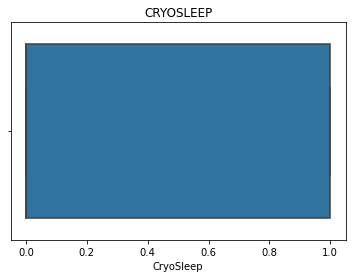

As we can see in the figure above;
Outlier number of 'CRYOSLEEP' feature: 0
--------------------------------


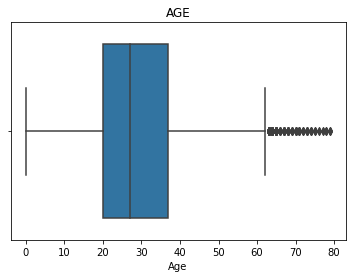

As we can see in the figure above;
Outlier number of 'AGE' feature: 156
--------------------------------


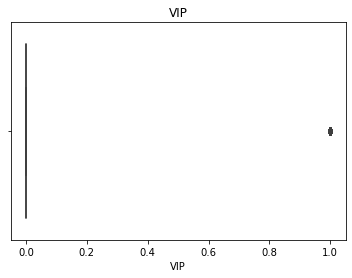

As we can see in the figure above;
Outlier number of 'VIP' feature: 390
--------------------------------


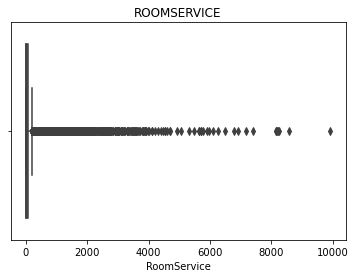

As we can see in the figure above;
Outlier number of 'ROOMSERVICE' feature: 1789
--------------------------------


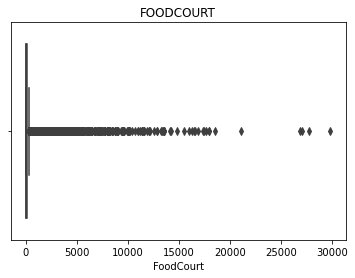

As we can see in the figure above;
Outlier number of 'FOODCOURT' feature: 1777
--------------------------------


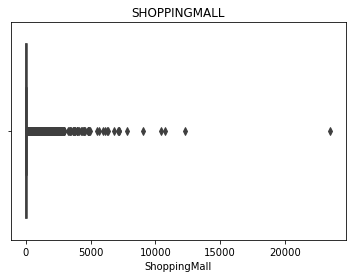

As we can see in the figure above;
Outlier number of 'SHOPPINGMALL' feature: 1820
--------------------------------


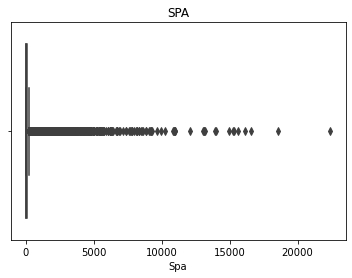

As we can see in the figure above;
Outlier number of 'SPA' feature: 1744
--------------------------------


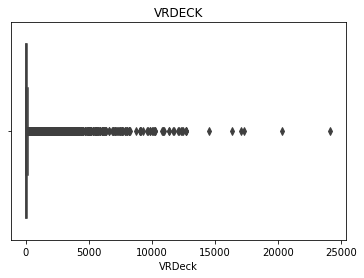

As we can see in the figure above;
Outlier number of 'VRDECK' feature: 1796
--------------------------------


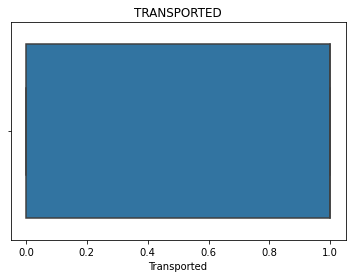

As we can see in the figure above;
Outlier number of 'TRANSPORTED' feature: 0
--------------------------------


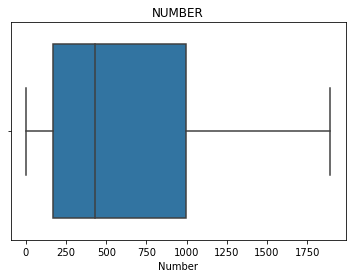

As we can see in the figure above;
Outlier number of 'NUMBER' feature: 0
--------------------------------


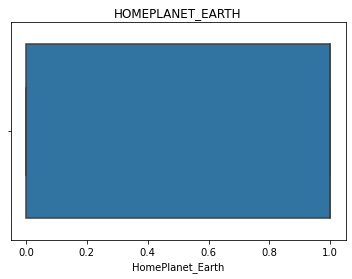

As we can see in the figure above;
Outlier number of 'HOMEPLANET_EARTH' feature: 0
--------------------------------


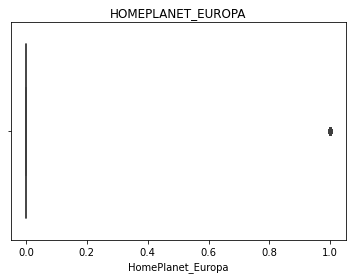

As we can see in the figure above;
Outlier number of 'HOMEPLANET_EUROPA' feature: 2070
--------------------------------


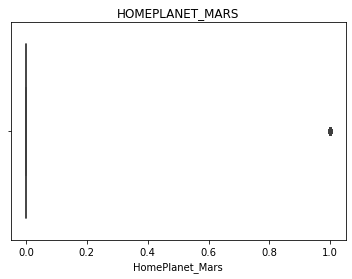

As we can see in the figure above;
Outlier number of 'HOMEPLANET_MARS' feature: 1722
--------------------------------


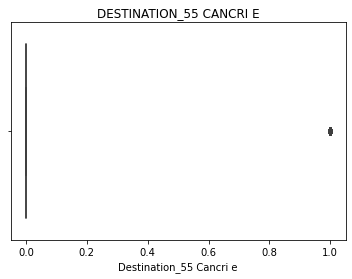

As we can see in the figure above;
Outlier number of 'DESTINATION_55 CANCRI E' feature: 1750
--------------------------------


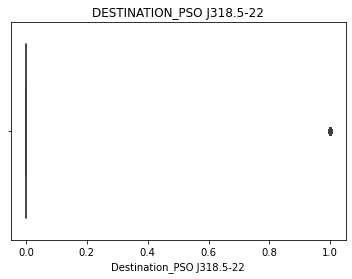

As we can see in the figure above;
Outlier number of 'DESTINATION_PSO J318.5-22' feature: 778
--------------------------------


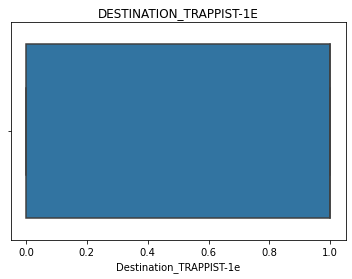

As we can see in the figure above;
Outlier number of 'DESTINATION_TRAPPIST-1E' feature: 0
--------------------------------


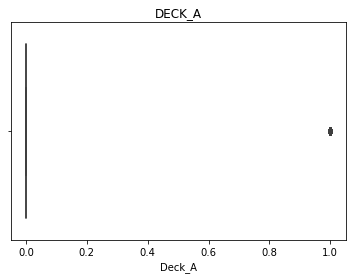

As we can see in the figure above;
Outlier number of 'DECK_A' feature: 256
--------------------------------


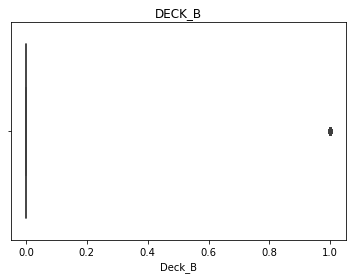

As we can see in the figure above;
Outlier number of 'DECK_B' feature: 779
--------------------------------


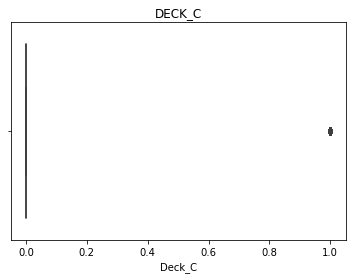

As we can see in the figure above;
Outlier number of 'DECK_C' feature: 747
--------------------------------


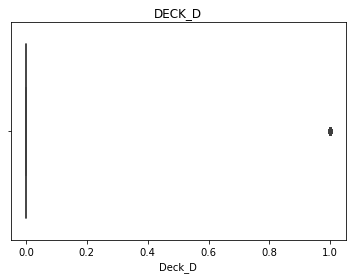

As we can see in the figure above;
Outlier number of 'DECK_D' feature: 478
--------------------------------


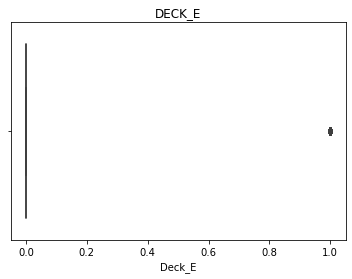

As we can see in the figure above;
Outlier number of 'DECK_E' feature: 876
--------------------------------


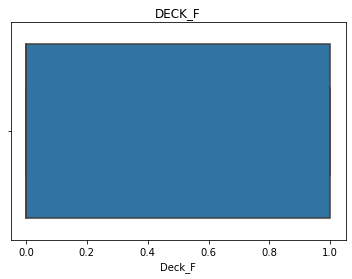

As we can see in the figure above;
Outlier number of 'DECK_F' feature: 0
--------------------------------


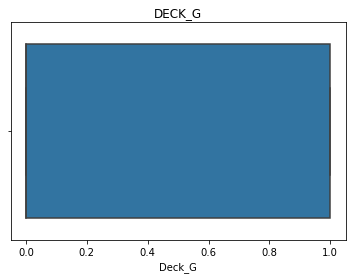

As we can see in the figure above;
Outlier number of 'DECK_G' feature: 0
--------------------------------


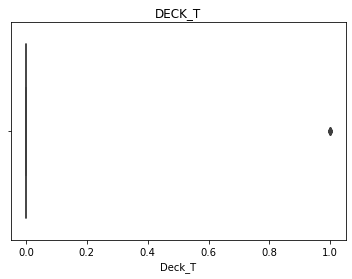

As we can see in the figure above;
Outlier number of 'DECK_T' feature: 5
--------------------------------


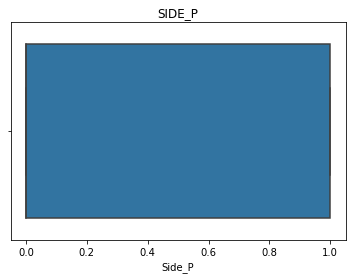

As we can see in the figure above;
Outlier number of 'SIDE_P' feature: 0
--------------------------------


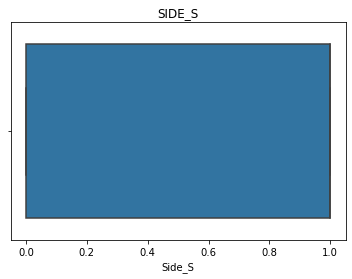

As we can see in the figure above;
Outlier number of 'SIDE_S' feature: 0
--------------------------------


In [184]:
#Visualize outlier with boxplot
for feature in columns_for_outlier:
    outlier_process(train_data, feature, "visualizing")

In [185]:
# Pressing outlier values
for feature in columns_for_outlier:
    train_data = outlier_process(train_data, feature, "pressing")

In [186]:
# Report last situation
for feature in columns_for_outlier:
    outlier_process(train_data, feature, "reporting")

'CRYOSLEEP' feature has no any outlier
'AGE' feature has no any outlier
'VIP' feature has no any outlier
'ROOMSERVICE' feature has no any outlier
'FOODCOURT' feature has no any outlier
'SHOPPINGMALL' feature has no any outlier
'SPA' feature has no any outlier
'VRDECK' feature has no any outlier
'TRANSPORTED' feature has no any outlier
'NUMBER' feature has no any outlier
'HOMEPLANET_EARTH' feature has no any outlier
'HOMEPLANET_EUROPA' feature has no any outlier
'HOMEPLANET_MARS' feature has no any outlier
'DESTINATION_55 CANCRI E' feature has no any outlier
'DESTINATION_PSO J318.5-22' feature has no any outlier
'DESTINATION_TRAPPIST-1E' feature has no any outlier
'DECK_A' feature has no any outlier
'DECK_B' feature has no any outlier
'DECK_C' feature has no any outlier
'DECK_D' feature has no any outlier
'DECK_E' feature has no any outlier
'DECK_F' feature has no any outlier
'DECK_G' feature has no any outlier
'DECK_T' feature has no any outlier
'SIDE_P' feature has no any outlier
'SID

In [187]:
train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Number,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0.0,39.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0002_01,0.0,24.0,0.0,109.000,9.000,25.0,222.5,44.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0003_01,0.0,58.0,0.0,43.000,304.375,0.0,222.5,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0003_02,0.0,33.0,0.0,0.000,304.375,115.0,222.5,177.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0004_01,0.0,16.0,0.0,201.875,70.000,115.0,222.5,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0.0,41.0,0.0,0.000,304.375,0.0,222.5,74.0,0.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9278_01,1.0,18.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1499.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9279_01,0.0,26.0,0.0,0.000,0.000,115.0,1.0,0.0,1.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [188]:
# Time to split train dataset into X_data including data and y_data including targets
X_data = train_data.drop("Transported", axis=1).values
y_data = train_data["Transported"].values.reshape(-1,1)

In [189]:
# Split train dataset into train dataset which model will be trained,
# and validation dataset which model performance will be validated

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                 test_size=0.2,
                                                 random_state=42)
print("for train dataset:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nfor validation dataset:")
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

for train dataset:
X_train shape: (6795, 25)
y_train shape: (6795, 1)

for validation dataset:
X_val shape: (1699, 25)
y_val shape: (1699, 1)


In [190]:
# We will set Pipeline to use several libraries together. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("min_max", MinMaxScaler(feature_range=(0,1)))
])
X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)

# Modelling

In [191]:
# Setting some parameters
input_shape = X_train.shape[1]
saved_model_dir="best_weights.h5"
batch_size=64
epoch=150
verbose=1

In [192]:
# Building DNN model
from tensorflow.keras import models as m, layers as l, optimizers as opt, callbacks as cb
import tensorflow as tf

In [193]:


def create_uncompiled_model(input_shape):
    model = m.Sequential([
                        l.Flatten(input_shape=[input_shape]),
                        l.BatchNormalization(),
        
                        l.Dense(1024, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.2),
        
                        l.Dense(512, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.2),

                        l.Dense(256, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.3),
        
                        l.Dense(128, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.2),

                        l.Dense(64, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.3),
        
                        l.Dense(32, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.3),
                        
                        l.Dense(16, kernel_initializer="he_normal"),
                        l.BatchNormalization(),
                        l.Activation("relu"),
                        l.Dropout(0.2),

                        l.Dense(1, activation="sigmoid")    
                        ])

    return model

model = create_uncompiled_model(input_shape)

model.compile(loss="binary_crossentropy",
             optimizer=opt.Adam(0.0001),
             metrics=["accuracy"])

In [194]:
# Best weights will be loaded to model after model trains
checkpoint = cb.ModelCheckpoint(saved_model_dir,
                               save_best_only = True)

In [195]:
# def adjust_learning_rate():
#     model = create_uncompiled_model(input_shape)
#     lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 *10**(epoch / 20))
#     ### START CODE HERE
#     # Select your optimizer
#     optimizer = tf.keras.optimizers.Adam()
#     # Compile the model passing in the appropriate loss
#     model.compile(loss="binary_crossentropy",
#     optimizer=optimizer,
#     metrics=["accuracy"])
#     ### END CODE HERE
#     history = model.fit(X_train, y_train, batch_size=batch_size,
#                  epochs=epoch,
#                  verbose=verbose,
#                  validation_data=(X_val, y_val),
#                  callbacks=[checkpoint,lr_schedule])
#     return history
# lr_history = adjust_learning_rate()
# # Plot the loss for every LR
# plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
# plt.axis([1e-6, 1, 0, 30])

In [ ]:
# Model training
hist = model.fit(X_train, y_train, batch_size=batch_size,
                 epochs=100,
                 verbose=verbose,
                 validation_data=(X_val, y_val),
                 callbacks=[checkpoint])

print("Best weights loading ...")
model.load_weights(saved_model_dir)
print("Completed.")

Epoch 1/100
107/107 [==============================] - 3s 14ms/step - loss: 0.7773 - accuracy: 0.5394 - val_loss: 0.6280 - val_accuracy: 0.6533
Epoch 2/100
107/107 [==============================] - 1s 12ms/step - loss: 0.6892 - accuracy: 0.6016 - val_loss: 0.5808 - val_accuracy: 0.6810
Epoch 3/100
107/107 [==============================] - 1s 12ms/step - loss: 0.6496 - accuracy: 0.6391 - val_loss: 0.5478 - val_accuracy: 0.7310
Epoch 4/100
107/107 [==============================] - 1s 12ms/step - loss: 0.6167 - accuracy: 0.6652 - val_loss: 0.5244 - val_accuracy: 0.7440
Epoch 5/100
107/107 [==============================] - 1s 12ms/step - loss: 0.6030 - accuracy: 0.6737 - val_loss: 0.5094 - val_accuracy: 0.7657
Epoch 6/100
107/107 [==============================] - 1s 12ms/step - loss: 0.5853 - accuracy: 0.6957 - val_loss: 0.4999 - val_accuracy: 0.7646
Epoch 7/100
107/107 [==============================] - 1s 13ms/step - loss: 0.5751 - accuracy: 0.6967 - val_loss: 0.4921 - val_accuracy:

107/107 [==============================] - 1s 11ms/step - loss: 0.4707 - accuracy: 0.7734 - val_loss: 0.4444 - val_accuracy: 0.7840
Epoch 58/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4749 - accuracy: 0.7722 - val_loss: 0.4458 - val_accuracy: 0.7858
Epoch 59/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4770 - accuracy: 0.7700 - val_loss: 0.4471 - val_accuracy: 0.7816
Epoch 60/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4722 - accuracy: 0.7713 - val_loss: 0.4458 - val_accuracy: 0.7869
Epoch 61/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4723 - accuracy: 0.7798 - val_loss: 0.4433 - val_accuracy: 0.7869
Epoch 62/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4756 - accuracy: 0.7754 - val_loss: 0.4426 - val_accuracy: 0.7875
Epoch 63/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4803 - accuracy: 0.7704 - val_loss: 0.4433 - val_accuracy: 0.778

In [ ]:
model.summary()

In [ ]:
# Plot the results
def plot_result(metrics):
    fig,ax = plt.subplots(1,1, figsize = (15,7))
    ax.plot(hist.history[metrics], "r", label=f"Train {metrics.title()}")
    ax.plot(hist.history[f"val_{metrics}"], "b", label=f"Validation {metrics.title()}")
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metrics.title())
    ax.grid(True)
    plt.show()
    
plot_result("accuracy")
plot_result("loss") 


In [ ]:
# It is time to touch to test dataset
# Lets make preprocess on the test dataset
test_data_model = test_data.copy()
test_data_model.set_index("PassengerId", inplace=True)
test_data_model.drop("Name", axis=1, inplace=True)
test_data_model = convert_bool_to_int(test_data_model, ["VIP", "CryoSleep"])
test_data_model = split_cabin_col(test_data_model)
test_data_model = data_dummies(test_data_model, cols_for_dummies)
test_data_model = test_data_model.astype("float64")
for feature in test_data_model.columns:
    test_data_model = outlier_process(test_data_model, feature, "pressing")
X_test = pipeline.transform(test_data_model)

In [ ]:
#model.load_weights(saved_model_dir)

In [ ]:
# Prediction test data and submit the results
pred = model.predict(X_test)
y_pred = np.round(pred)
submission_data = pd.DataFrame(columns=["PassengerId", "Transported"])
submission_data["PassengerId"]=test_data_model.index
submission_data["Transported"]= [True if x==1. else False for x in y_pred]

submission_data.to_csv('submission.csv', index=False)
submission_data.to_csv('Submission.csv', index=False)
print('Submitted!')

In [ ]:
submission_data